In [19]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import random

One of the most interesting aspects of percolation theory is the study of phase transitions, where a system's properties change abruptly as a parameter is varied. In this application, we are investigating the behavior of a graph generated using a log-normal distribution for edge probabilities. The goal is to study the effect of the mean and standard deviation of the distribution on the size of the largest connected component, also known as the giant component, in the graph.

In [20]:
# Define a function to generate edge probabilities using a log-normal distribution
def edge_probability_distribution(mean, std_dev):
    return np.random.lognormal(mean, std_dev)

# Define a function to generate a random graph with n nodes, based on the provided mean, standard deviation, and connection probability p
def generate_graph(n, mean, std_dev, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                edge_prob = edge_probability_distribution(mean, std_dev)
                if random.random() < edge_prob:
                    G.add_edge(i, j)
    return G

# Define a function to analyze the graph and calculate the giant component ratio

def analyze_graph(G):
    giant_component_ratio = 0
    
    for component in nx.connected_components(G):
        if len(component) > giant_component_ratio:
            giant_component_ratio = len(component)

    return giant_component_ratio / G.number_of_nodes()





In [21]:
# Parameters
n = 100
p = 0.5
mean_values = np.linspace(-10, -3, 50)
std_dev_values = np.linspace(0.1, 5, 50)

# Calculate the average giant component ratio for each combination of mean and standard deviation values

heatmap_data = np.zeros((len(mean_values), len(std_dev_values)))

for i, mean in enumerate(mean_values):
    for j, std_dev in enumerate(std_dev_values):
        ratios = []
        for _ in range(10):
            G = generate_graph(n, mean, std_dev, p)
            giant_component_ratio = analyze_graph(G)
            ratios.append(giant_component_ratio)
        
        avg_ratio = np.mean(ratios)
        heatmap_data[i, j] = avg_ratio

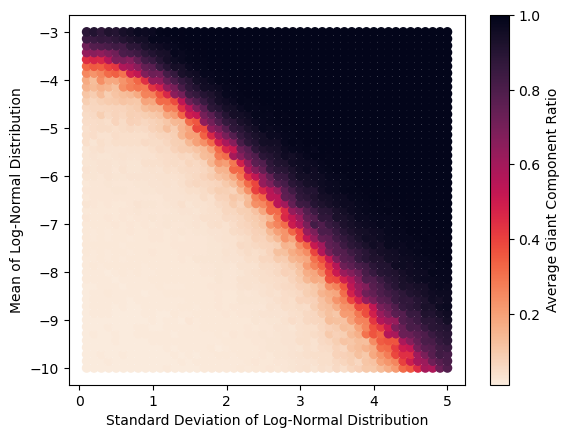

In [22]:
# Phase diagram
std_dev_grid, mean_grid = np.meshgrid(std_dev_values, mean_values)
plt.figure()
plt.scatter(std_dev_grid, mean_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r)
plt.xlabel('Standard Deviation of Log-Normal Distribution')
plt.ylabel('Mean of Log-Normal Distribution')
plt.colorbar(label='Average Giant Component Ratio')
plt.show()

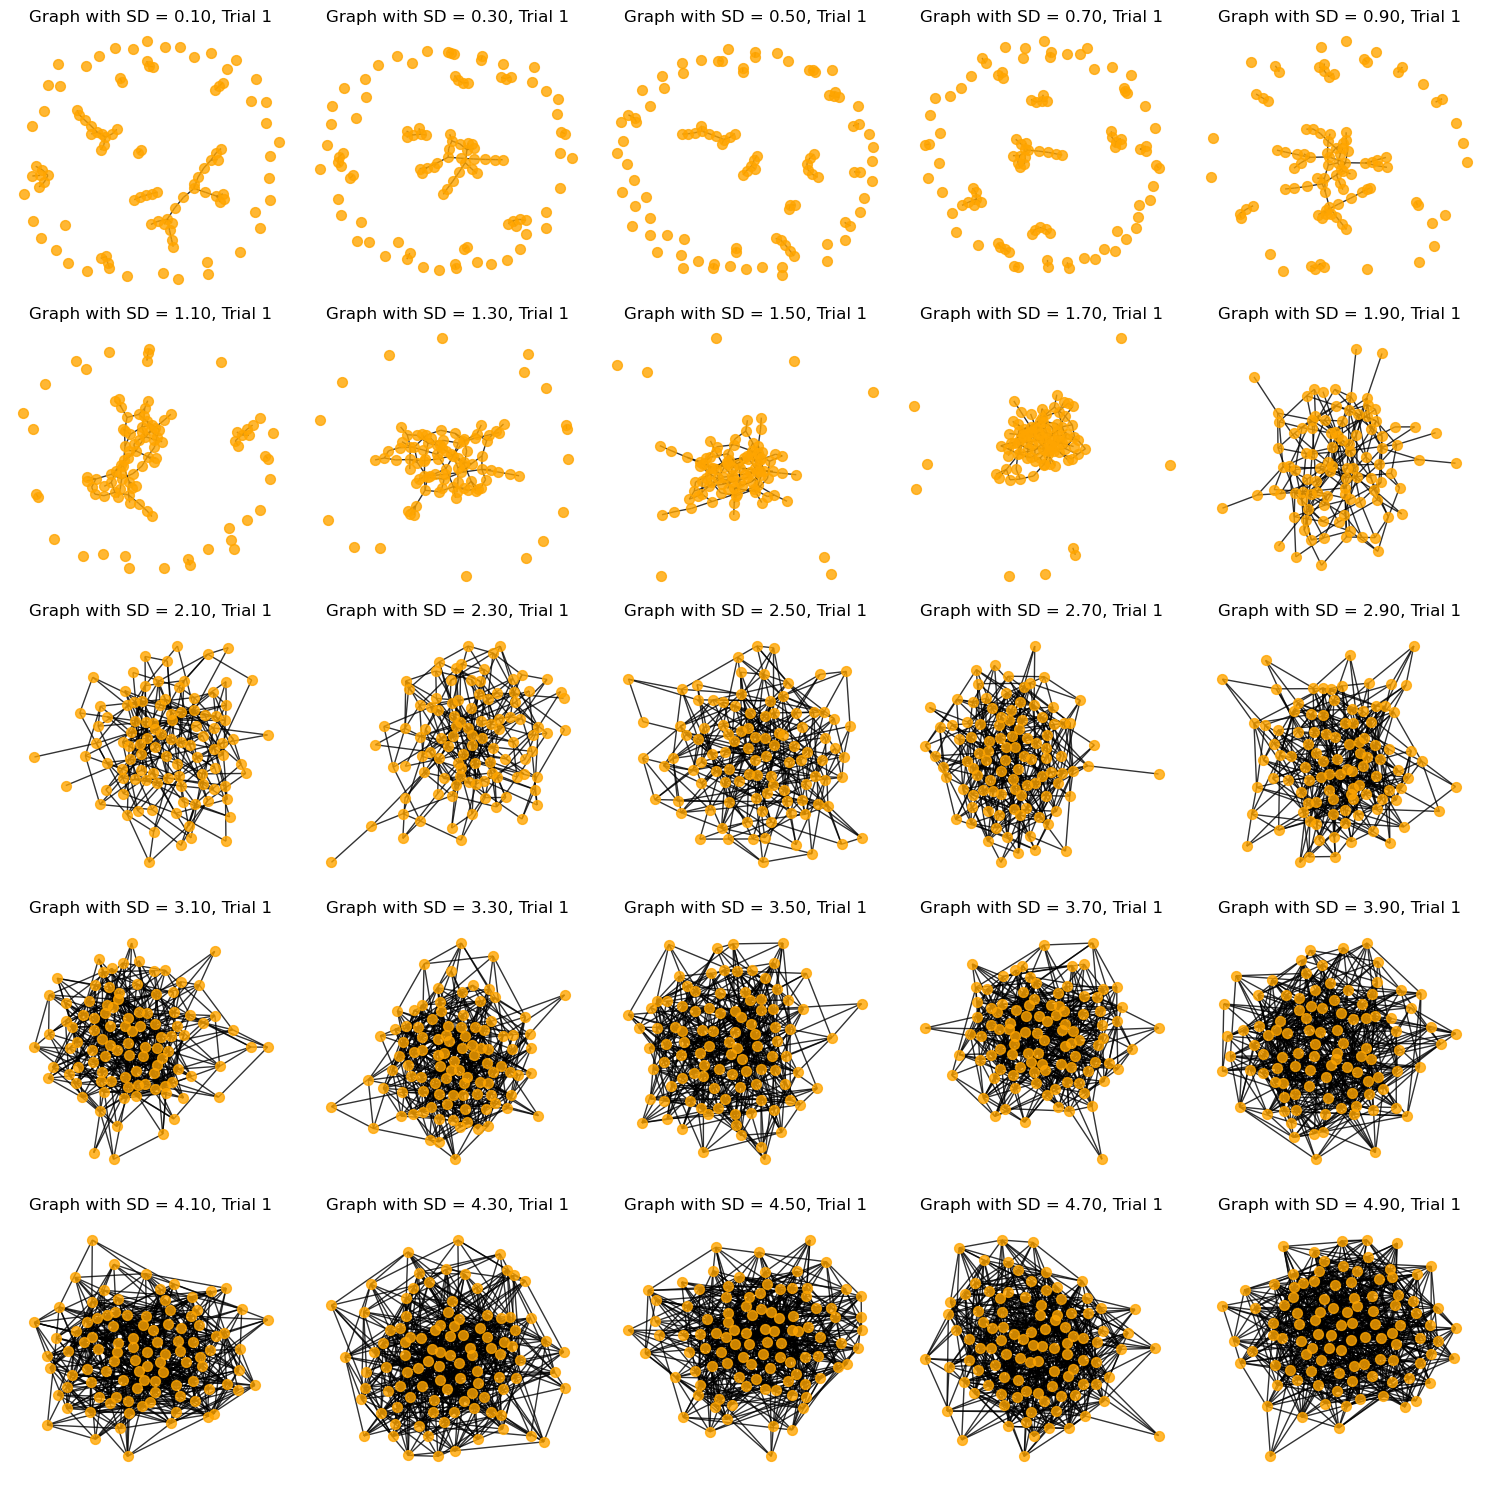

In [23]:
# Generate the average giant component ratios and their standard deviations

n_plots = len(std_dev_values) // 2  # Use integer division here
ncols = 5
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

mean = -4
avg_ratios = []
std_devs = []

for j, std_dev in enumerate(std_dev_values):
    ratios = []
    for i in range(100):
        G = generate_graph(n, mean, std_dev, p)
        giant_component_ratio = analyze_graph(G)
        ratios.append(giant_component_ratio)
        if i == 0 and j % 2 == 0:  
            row, col = (j // 2) // ncols, (j // 2) % ncols
            ax = axes[row, col]
            pos = nx.spring_layout(G)
            nx.draw_networkx(G, pos, node_color='orange', node_size=50, with_labels=False, alpha=0.8, ax=ax)
            ax.set_title(f'Graph with SD = {std_dev:.2f}, Trial {i+1}') \
            ax.axis('off')
    avg_ratio = np.mean(ratios)
    std_dev_ratio = np.std(ratios)
    avg_ratios.append(avg_ratio)
    std_devs.append(std_dev_ratio)

avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)

# Adjust layout
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


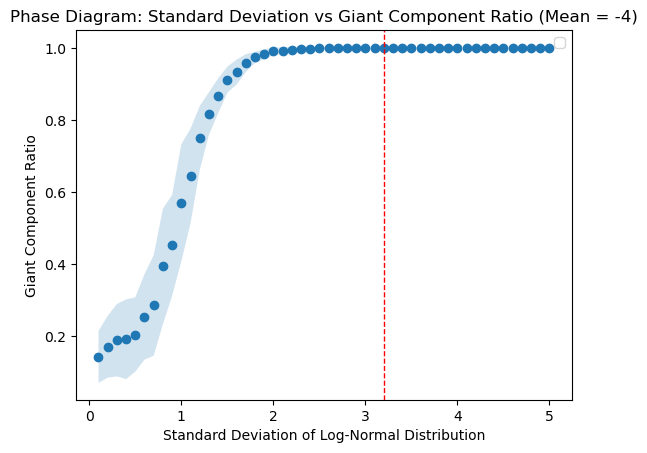

In [24]:
# Find the index where the giant component ratio reaches 1.0
index_1 = np.argmax(avg_ratios >= 1.0)

# Get the corresponding standard deviation value
std_dev_1 = std_dev_values[index_1]

# Step 2: Create a line plot with shaded error regions
fig, ax = plt.subplots()
ax.plot(std_dev_values, avg_ratios, 'o')
ax.fill_between(std_dev_values, avg_ratios - std_devs, avg_ratios + std_devs, alpha=0.2)

# Draw a vertical line when the giant component ratio reaches 1.0
ax.axvline(std_dev_1, color='red', linestyle='--',  linewidth=1)

ax.set_xlabel('Standard Deviation of Log-Normal Distribution')
ax.set_ylabel('Giant Component Ratio')
ax.set_title('Phase Diagram: Standard Deviation vs Giant Component Ratio (Mean = -4)')
ax.legend()
plt.show()
